In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#reading the csv file
file = pd.read_csv("/Users/admin/Documents/Manipal/MRM/CarPrices/CarPrice_Assignment.csv")
tester = pd.read_csv("/Users/admin/Documents/Manipal/MRM/CarPrices/CarPrice_Assignment.csv")
file.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
#find correlation
file.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


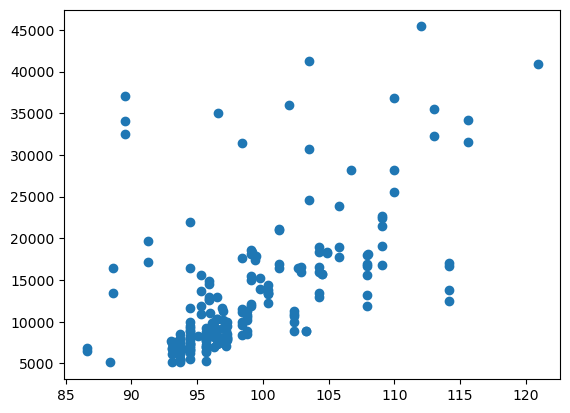

In [3]:
#we can see that a few variables have positive correlation to price
#wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower
#we will now create seperate variables for each
wheelbase = file.wheelbase
carlength = file.carlength
carwidth = file.carwidth
carheight = file.carheight
curbweight = file.curbweight
enginesize = file.enginesize
boreratio = file.boreratio
stroke = file.stroke
compressionratio = file.compressionratio
horsepower = file.horsepower
price = file.price

#price vs wheelbase
plt.scatter(wheelbase, price)


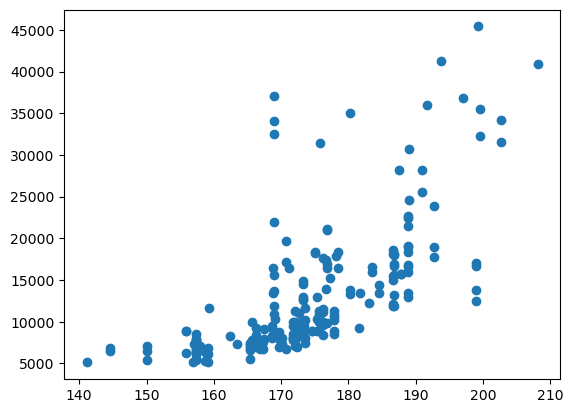

In [4]:
#price vs carlength
plt.scatter(carlength, price)


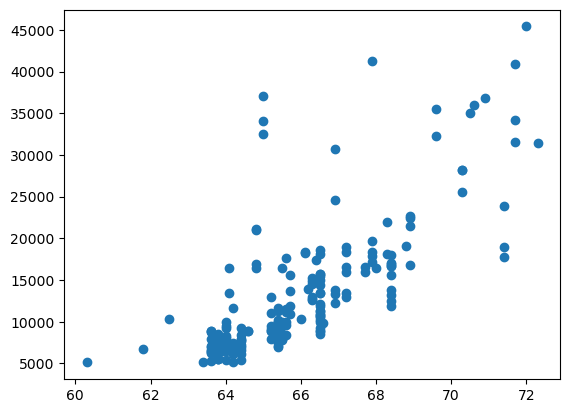

In [5]:
#price vs carwidth
plt.scatter(carwidth, price)


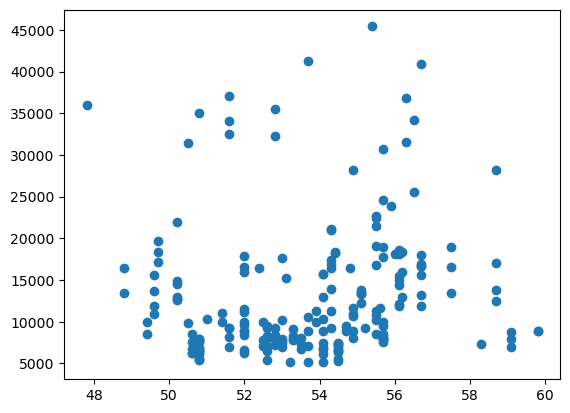

In [6]:
#price vs carheight
plt.scatter(carheight, price)


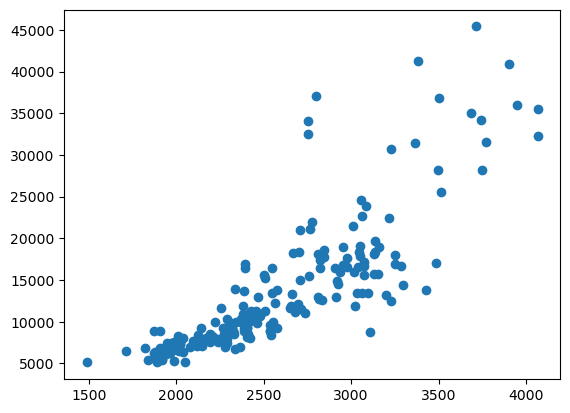

In [7]:
#price vs curbweight
plt.scatter(curbweight, price)


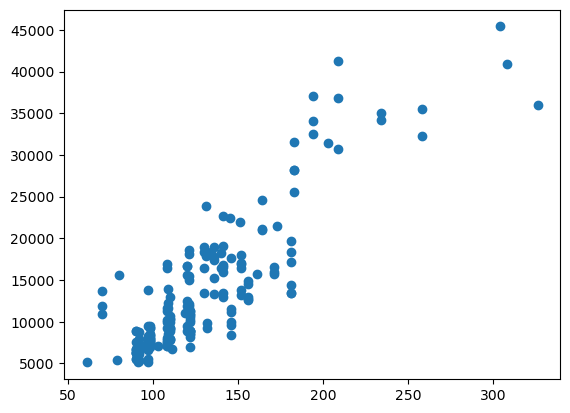

In [8]:
#price vs enginersize
plt.scatter(enginesize, price)


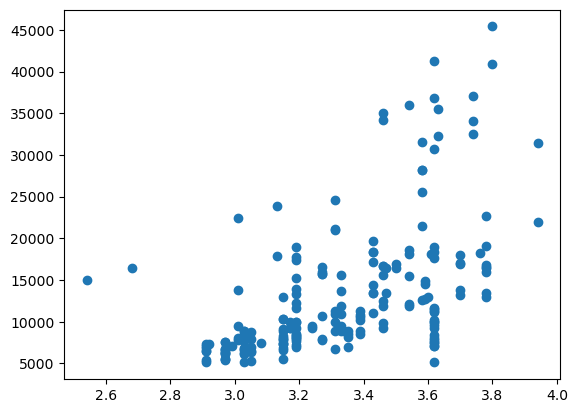

In [9]:
#price vs boreratio
plt.scatter(boreratio, price)


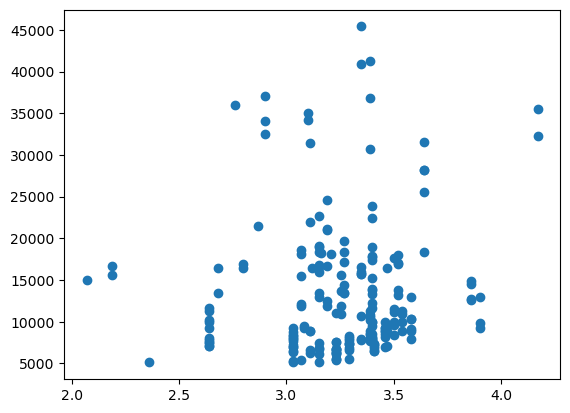

In [10]:
#price vs stroke
plt.scatter(stroke, price)


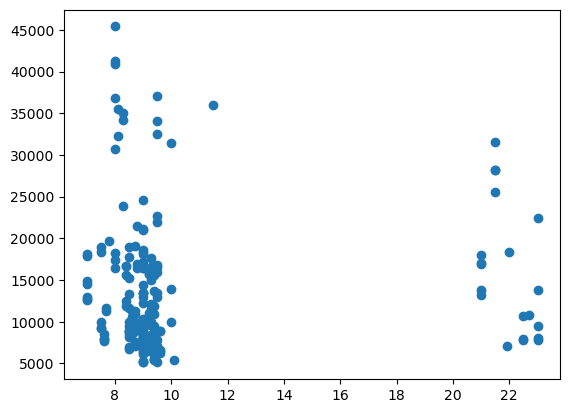

In [11]:
#price vs compressionratio
plt.scatter(compressionratio, price)


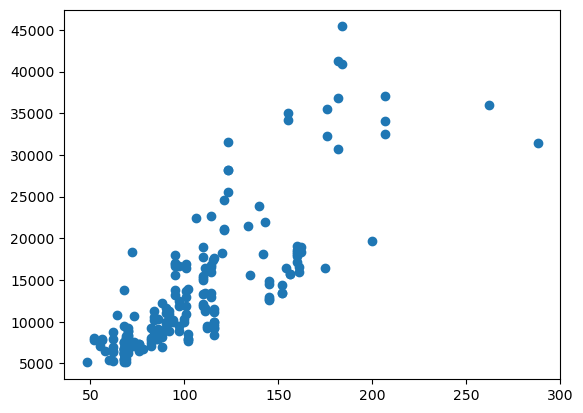

In [12]:
#price vs horsepower
plt.scatter(horsepower, price)

In [13]:
#optimising the weights & producing predicted values
class LinearRegression:
    
    def __init__(self, lr=0.0005, it=50000):
        self.lr=lr
        self.it= it
        self.weights= None
        self.base= None

    def optimize(self, x, y):
        sample, feat = x.shape #samples & features
        self.weights = np.zeros(feat) #1D array of zeroes initialization
        self.bias = 0

        for i in range(self.it):  
            #y = mx + c (hypothesis fn)
            y_pred = np.dot(x, self.weights) + self.bias
            dw = (1/sample) * np.dot(x.T, (y_pred - y)) #x.T gives the transpose to match to each value of (y_pred - y)
            db = (1/sample) * np.sum(y_pred-y) #mean change in bias

            #Train the weights and biases
            self.weights = self.weights - self.lr * dw #optimization formula
            self.bias = self.bias - self.lr * db   
          

    def predict(self, x):
        y_pred = np.dot(x,self.weights) + self.bias
        return y_pred   
    

In [14]:
car_ID = tester.car_ID
symboling = tester.symboling
CarName = tester.CarName
fueltype = tester.fueltype
aspiration = tester.aspiration
doornumber = tester.doornumber
carbody = tester.carbody
drivewheel = tester.drivewheel
enginelocation = tester.enginelocation
enginetype = tester.enginetype
cylindernumber = tester.cylindernumber
fuelsystem = tester.fuelsystem
peakrpm = tester.peakrpm
citympg = tester.citympg
highwaympg = tester.highwaympg
price = tester.price

In [15]:
#dropping all columns other than those with positive relation
#wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower
tester = tester.drop(["car_ID"], axis=1)
tester = tester.drop(["symboling"], axis=1)
tester = tester.drop(["CarName"], axis=1)
tester = tester.drop(["fueltype"], axis=1)
tester = tester.drop(["aspiration"], axis=1)
tester = tester.drop(["doornumber"], axis=1)
tester = tester.drop(["carbody"], axis=1)
tester = tester.drop(["drivewheel"], axis=1)
tester = tester.drop(["enginelocation"], axis=1)
tester = tester.drop(["enginetype"], axis=1)
tester = tester.drop(["cylindernumber"], axis=1)
tester = tester.drop(["fuelsystem"], axis=1)
tester = tester.drop(["peakrpm"], axis=1)
tester = tester.drop(["citympg"], axis=1)
tester = tester.drop(["highwaympg"], axis=1)
tester = tester.drop(["price"], axis=1)
tester.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115


In [16]:
#initializing training variables
x_train, y_train = tester.iloc[:,:10].values, tester.iloc[:,-1].values
x_train.shape, y_train.shape

((205, 10), (205,))

In [17]:
x_test, y_test = tester.iloc[:,:10].values, tester.iloc[:,-1].values
x_test.shape, y_test.shape
print("x train is", x_train)
print("Y train is", y_train)
print("X test is", x_test)
print("Y test is", y_test)

x train is [[ 88.6  168.8   64.1  ...   2.68   9.   111.  ]
 [ 88.6  168.8   64.1  ...   2.68   9.   111.  ]
 [ 94.5  171.2   65.5  ...   3.47   9.   154.  ]
 ...
 [109.1  188.8   68.9  ...   2.87   8.8  134.  ]
 [109.1  188.8   68.9  ...   3.4   23.   106.  ]
 [109.1  188.8   68.9  ...   3.15   9.5  114.  ]]
Y train is [111 111 154 102 115 110 110 110 140 160 101 101 121 121 121 182 182 182
  48  70  70  68  68 102  68  68  68 102  88 145  58  76  60  76  76  76
  76  86  86  86  86 101 100  78  70  70  90 176 176 262  68  68  68  68
  68 101 101 101 135  84  84  84  84  64  84 120  72 123 123 123 123 155
 155 184 184 175  68  68  68 102 116  88 145 145 145  88  88 116 116  69
  55  69  69  69  69  69  69  69  69  97  97 152 152 152 160 200 160  97
  95  97  95  95  95  95  95  97  95 142  68 102  68  68  68  88 145 143
 207 207 207 288  90  90 110 110 110 110 160 160  69  73  73  82  82  94
  82 111  82  94  82 111  62  62  62  62  62  62  70  70  56  56  70  70
  70  70  70 112 112 

In [18]:
#Creating starting test and train values
x_train = (x_train - x_train.mean(axis = 0)) / ( x_train.max(axis = 0) - x_train.min(axis = 0) )
x_test = (x_test - x_test.mean(axis = 0)) / ( x_test.max(axis = 0) - x_test.min(axis = 0) )
print("X train is ", x_train)
print("Y train is ", x_test)

X train is  [[-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.1240987  -0.04252639 -0.03398374 ...  0.10218351 -0.07140854
   0.20784553]
 ...
 [ 0.30155728  0.22016017  0.24934959 ... -0.18353078 -0.08390854
   0.1245122 ]
 [ 0.30155728  0.22016017  0.24934959 ...  0.06885017  0.80359146
   0.00784553]
 [ 0.30155728  0.22016017  0.24934959 ... -0.05019744 -0.04015854
   0.04117886]]
Y train is  [[-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.1240987  -0.04252639 -0.03398374 ...  0.10218351 -0.07140854
   0.20784553]
 ...
 [ 0.30155728  0.22016017  0.24934959 ... -0.18353078 -0.08390854
   0.1245122 ]
 [ 0.30155728  0.22016017  0.24934959 ...  0.06885017  0.80359146
   0.00784553]
 [ 0.30155728  0.22016017  0.24934959 ... -0.05019744 -0.04015854
   0.041

<function matplotlib.pyplot.show(close=None, block=None)>

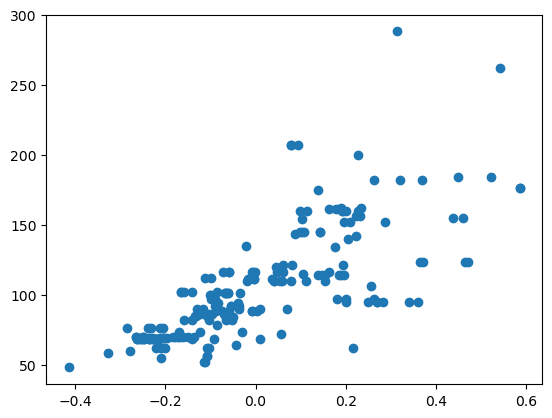

In [19]:
fig = plt.figure()
plt.scatter(x_train[:, 4],y_train)
plt.show

In [20]:
#calling the class

reg = LinearRegression()
reg.optimize(x_train,y_train)
predictions = reg.predict(x_test)
print(predictions)

[116.2930077  116.2930077  118.62680531  95.30495581 114.07872035
 109.42122229 122.79115171 124.46288023 133.33475843 138.63764824
  99.76655706  99.76655706 115.32783101 116.16369527 124.62830479
 158.81557814 168.35983471 171.38575375  38.0551432   68.84838488
  70.03762787  70.86140391  70.87697467  89.73609275  72.67169841
  73.00604411  73.00604411  91.1052856   85.83201617 142.20317802
  62.30695513  69.79132998  59.15576172  68.8914585   69.13461901
  68.89842158  59.82720798  88.35446136  89.15993055  89.53155609
  85.00528309  96.35386383  99.89390813  84.54284653  68.84838488
  69.3802985  107.9023495  190.78407766 190.78407766 228.00750326
  67.33941654  67.49139186  67.56737952  69.92060361  70.86231899
 100.35434063 100.35434063 100.43032829 113.58785558 100.55166981
  97.22587317 100.55166981  97.22587317  69.9386151   97.45383615
 122.00351608  80.27871771 125.82445538 124.86664381 128.2590012
 135.28122832 169.57524118 174.18745629 198.46960441 196.91836115
 146.024652

In [21]:
#mean square error
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [22]:
MSE = mse(y_test, predictions)
print(MSE)

193.98280334757163


In [23]:
result = 1 - ( (np.sum(np.square(y_test - predictions))) / (np.sum( np.square(y_test - y_test.mean()) )) )
print("Percentage Accuracy is: ", (100*result), "%")

Percentage Accuracy is:  87.53414514260886 %
